In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import urllib
import sklearn
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import value_counts as pdc
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from scipy.sparse import coo_matrix
from sklearn.utils import resample
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
fintec = pd.read_csv('./fintec_train_data_set_alldata.csv')

In [3]:
fintec

,REPURCHASE,DiagnosisCode_DESC,age <25(300),age 25-35(300-420),age 35-45(420-540),ICD10_Code_Type,ternure_m,recency_m,SIN,SIN_his,...,GENDER,stick_level2,AGE,cust_group2,<10k,10k-50k,50k-100k,100k-500k,500k-1000k,>1000k
0,0,7,1,0,0,4,200,18,1,1,...,0,5,1,76,0,1,0,0,0,0
1,0,20,1,0,0,26,70,70,0,0,...,0,8,4,71,1,0,0,0,0,0
2,0,20,1,0,0,26,282,269,0,0,...,0,10,4,69,1,0,0,0,0,0
3,0,20,0,0,1,26,490,237,0,0,...,0,10,4,73,0,1,0,0,0,0
4,0,9,1,0,0,4,191,119,0,0,...,0,10,4,67,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,1,2,0,1,0,20,343,120,0,0,...,1,9,4,57,0,0,0,1,0,0
95404,0,20,0,1,0,26,321,201,0,0,...,1,9,4,53,1,0,0,0,0,0
95405,0,20,1,0,0,26,263,240,0,0,...,1,9,4,54,0,1,0,0,0,0
95406,1,2,0,1,0,20,317,282,0,0,...,0,10,4,56,0,1,0,0,0,0


In [4]:
fintec.REPURCHASE.value_counts()

0    85311
1    10097
Name: REPURCHASE, dtype: int64

In [5]:
fintec.columns[1 : 70]

Index(['DiagnosisCode_DESC', 'age  <25(300)', 'age  25-35(300-420)',
       'age 35-45(420-540)', 'ICD10_Code_Type', 'ternure_m', 'recency_m',
       'SIN', 'SIN_his', 'REG', 'REG_his', 'ILP', 'ILP_his', 'AHa', 'AHa_his',
       'AHb', 'AHb_his', 'AHc', 'AHc_his', 'AHd', 'AHd_his', 'VIP',
       'WEALTH_LEVEL', 'DIGI_FLG', 'TOPCARD', 'GENDER', 'stick_level2', 'AGE',
       'cust_group2', '<10k', '10k-50k', '50k-100k', '100k-500k', '500k-1000k',
       '>1000k'],
      dtype='object')

In [6]:
fin = fintec.to_numpy()

In [7]:
X = fin[:,1:70]
y = fin[:,0:1]
names = fintec.columns[1 : 70]

In [8]:
print (X.shape)

(95408, 35)


In [9]:
X

array([[ 7,  1,  0, ...,  0,  0,  0],
       [20,  1,  0, ...,  0,  0,  0],
       [20,  1,  0, ...,  0,  0,  0],
       ...,
       [20,  1,  0, ...,  0,  0,  0],
       [ 2,  0,  1, ...,  0,  0,  0],
       [ 9,  1,  0, ...,  0,  0,  0]], dtype=int64)

In [10]:
print (y.shape)

(95408, 1)


In [11]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [12]:
print (names.shape)

(35,)


In [13]:
names


Index(['DiagnosisCode_DESC', 'age  <25(300)', 'age  25-35(300-420)',
       'age 35-45(420-540)', 'ICD10_Code_Type', 'ternure_m', 'recency_m',
       'SIN', 'SIN_his', 'REG', 'REG_his', 'ILP', 'ILP_his', 'AHa', 'AHa_his',
       'AHb', 'AHb_his', 'AHc', 'AHc_his', 'AHd', 'AHd_his', 'VIP',
       'WEALTH_LEVEL', 'DIGI_FLG', 'TOPCARD', 'GENDER', 'stick_level2', 'AGE',
       'cust_group2', '<10k', '10k-50k', '50k-100k', '100k-500k', '500k-1000k',
       '>1000k'],
      dtype='object')

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [15]:
rfc = RandomForestClassifier()
parameters = {'n_estimators': [100], 'max_depth':[10], 'criterion' : ["gini", "entropy"] , 'max_features' :["auto","sqrt", "log2"]}
grid_search = GridSearchCV(estimator=rfc, param_grid=parameters, cv= 2, n_jobs=-1)
grid_search.fit(X_train,y_train.ravel())





GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

In [16]:
best_para1 = grid_search.best_params_['n_estimators']
print('n_estimators:', best_para1)
best_para2 = grid_search.best_params_['max_depth']
print('max_depth:', best_para2)
best_para3 = grid_search.best_params_['criterion']
print('criterion:', best_para3)
best_para4 = grid_search.best_params_['max_features']
print('max_features:', best_para4)
print("Best score: %0.3f" % grid_search.best_score_)   


n_estimators: 100
max_depth: 10
criterion: entropy
max_features: sqrt
Best score: 0.897


In [17]:
rfc = RandomForestClassifier(n_estimators = best_para1 ,max_depth = best_para2, criterion = best_para3, max_features= best_para4)
rfc.fit(X_train,y_train.ravel())
y_predict = rfc.predict(X_test)
print('training score: ',rfc.score(X_train,y_train.ravel()))
print('testing score: ',rfc.score(X_test,y_test))

training score:  0.903062064834918
testing score:  0.8949096880131363


In [18]:
feature_importances_ = {}
_feat_labels = names
_importances = rfc.feature_importances_

In [19]:
indices = np.argsort(_importances)[::-1]

In [20]:
for f in range(X.shape[1]):
    feature_importances_.update({_feat_labels[indices[f]]:_importances[indices[f]]})

In [21]:
feature_importances_

{'stick_level2': 0.18626690530565868,
 'recency_m': 0.17127147822305383,
 'AGE': 0.11539475466330236,
 'cust_group2': 0.0872779685081572,
 'ternure_m': 0.06975101510440214,
 'WEALTH_LEVEL': 0.06777348277783482,
 'DiagnosisCode_DESC': 0.03114470000841709,
 'SIN': 0.025765501992212975,
 'ICD10_Code_Type': 0.025286047205795546,
 'ILP': 0.022705310059801302,
 'AHd_his': 0.019511162616085778,
 'SIN_his': 0.01752527616705979,
 'AHd': 0.01731368969289508,
 'ILP_his': 0.015639329077170236,
 'REG': 0.012663119433440688,
 'REG_his': 0.01200155462483105,
 'AHb_his': 0.01006524921414535,
 'AHb': 0.009560110833425353,
 'GENDER': 0.00894651760696353,
 'VIP': 0.008900857287066386,
 'DIGI_FLG': 0.00818265466215103,
 '<10k': 0.007140574734590341,
 '10k-50k': 0.007030325095213417,
 '50k-100k': 0.005465495449283464,
 'AHc': 0.004941069873884454,
 '100k-500k': 0.004883753520542176,
 'TOPCARD': 0.004581816544995355,
 'AHa': 0.0044648494418683075,
 'age  25-35(300-420)': 0.00405937322650321,
 'AHc_his': 0.0

In [22]:
np.set_printoptions(threshold= sys.maxsize)

In [23]:
print (y_predict.shape)

(28623,)


In [24]:
y_test_re = y_test.reshape(-1)

In [25]:
shoot_times=0
shooted_num=0
target=0

In [27]:
for i in range (0,7095):
    
    if y_predict[i] == 1:
     shoot_times = shoot_times + 1

    if y_test_re[i] == y_predict[i] == 1:
     shooted_num = shooted_num + 1
    
    if y_test_re[i] == 1:
     target = target + 1

In [28]:
print("repurchase customer :",target)
print("predict repurchase customer :",shoot_times)
print("actuallyrepurchase customer :",shooted_num)
print(180/285*100,'%')
print((shooted_num/741)*100,'%')

repurchase customer : 761
predict repurchase customer : 69
actuallyrepurchase customer : 36
63.1578947368421 %
4.8582995951417 %


 1) stick_level2                   0.186267
 2) recency_m                      0.171271
 3) AGE                            0.115395
 4) cust_group2                    0.087278
 5) ternure_m                      0.069751
 6) WEALTH_LEVEL                   0.067773
 7) DiagnosisCode_DESC             0.031145
 8) SIN                            0.025766
 9) ICD10_Code_Type                0.025286
10) ILP                            0.022705
11) AHd_his                        0.019511
12) SIN_his                        0.017525
13) AHd                            0.017314
14) ILP_his                        0.015639
15) REG                            0.012663
16) REG_his                        0.012002
17) AHb_his                        0.010065
18) AHb                            0.009560
19) GENDER                         0.008947
20) VIP                            0.008901
21) DIGI_FLG                       0.008183
22) <10k                           0.007141
23) 10k-50k                     

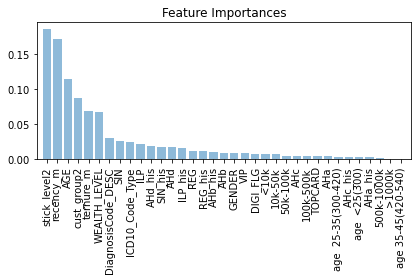

In [29]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            _feat_labels[indices[f]], 
                            _importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        _importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig('fig-forest-feature-importances.png', dpi=300)
plt.show()